In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("usertabledata.csv")
print(df.head(10))
df.dropna(inplace=True)
df=df.drop(['Date_of_birth'], axis=1)
labelEncoder = LabelEncoder()
labelEncoder.fit(df['Gender'])
df['Gender'] = labelEncoder.transform(df['Gender'])
labelEncoder.fit(df['State'])
df['State'] = labelEncoder.transform(df['State'])
labelEncoder.fit(df['City'])
df['City'] = labelEncoder.transform(df['City'])
labelEncoder.fit(df['Country'])
df['Country'] = labelEncoder.transform(df['Country'])


   USERID  Gender Date_of_birth  age             State        City Country
0       1    Male      9/2/1991   31           ONTARIO     TORONTO  CANADA
1       2    Male     2/27/2002   21  BRITISH_COLUMBIA   Vancouver  CANADA
2       3  Female     2/27/2003   20      SASKATCHEWAN   Saskatoon  CANADA
3       4  Female     2/28/2000   23          DELAWARE  Wilmington      US
4       5  Female      3/1/1992   31          DELAWARE  Wilmington      US
5       6  Female     2/27/2001   22          DELAWARE  Wilmington      US
6       7  Female      3/2/1988   35           ONTARIO     TORONTO  CANADA
7       8  Female     2/28/2000   23  BRITISH_COLUMBIA   Vancouver  CANADA
8       9    Male     3/10/1959   64      SASKATCHEWAN   Saskatoon  CANADA
9      10  Female      3/1/1993   30      SASKATCHEWAN   Saskatoon  CANADA


In [3]:
df

,USERID,Gender,age,State,City,Country
0,1,1,31,2,1,0
1,2,1,21,0,2,0
2,3,0,20,3,0,0
3,4,0,23,1,3,1
4,5,0,31,1,3,1
...,...,...,...,...,...,...
194,195,0,47,2,1,0
196,197,0,45,3,0,0
197,198,1,32,3,0,0
198,199,1,32,3,0,0


In [4]:
df_scaled = df.copy()
df_scaled[df_scaled.columns] = StandardScaler().fit_transform(df_scaled)
print(df_scaled.describe())

             USERID        Gender           age         State          City  \
count  1.910000e+02  1.910000e+02  1.910000e+02  1.910000e+02  1.910000e+02   
mean  -7.440238e-17  2.999346e-16 -2.232071e-16 -5.347671e-17  2.557582e-17   
std    1.002628e+00  1.002628e+00  1.002628e+00  1.002628e+00  1.002628e+00   
min   -1.700131e+00 -9.050125e-01 -1.504737e+00 -1.473608e+00 -1.295992e+00   
25%   -8.481342e-01 -9.050125e-01 -7.229735e-01 -5.538070e-01 -3.475840e-01   
50%   -1.370406e-02 -9.050125e-01 -2.254873e-01  3.659942e-01 -3.475840e-01   
75%    8.207260e-01  1.104957e+00  6.984154e-01  3.659942e-01  6.008238e-01   
max    1.795692e+00  1.104957e+00  2.190874e+00  1.285795e+00  1.549232e+00   

            Country  
count  1.910000e+02  
mean  -2.389014e-16  
std    1.002628e+00  
min   -4.901630e-01  
25%   -4.901630e-01  
50%   -4.901630e-01  
75%   -4.901630e-01  
max    2.040138e+00  


In [5]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))

pca_2_result



Explained variation per principal component: [0.38709405 0.18310309]
Cumulative variance explained by 2 principal components: 57.02%


array([[-0.91829426, -0.42376449],
       [ 0.73840053, -0.74595835],
       [-1.79988935, -2.11550774],
       [ 2.27973534, -2.03511321],
       [ 2.20762838, -1.80030014],
       [ 2.29474938, -2.04287599],
       [-0.84219907, -1.68352591],
       [ 0.83322842, -2.06188317],
       [-2.29168322,  0.61408882],
       [-1.87378593, -1.76357453],
       [-2.31413458,  0.71865283],
       [ 2.1899299 , -1.61685713],
       [ 1.97732768, -0.96081856],
       [ 2.29860745, -1.90543692],
       [ 2.08305122, -0.09717038],
       [ 2.22637032, -0.50823643],
       [ 2.20404913, -1.56605984],
       [ 2.25075072, -0.54408091],
       [-1.06415839,  0.34882148],
       [ 0.75471837, -1.60298926],
       [-1.98617289, -0.078367  ],
       [-1.88968554, -0.34902455],
       [-1.98693754, -1.18219436],
       [-1.94023595, -0.16021543],
       [-2.05622066, -0.93722183],
       [-1.91585556, -0.19605992],
       [-1.96627581, -1.16963822],
       [-1.96640597, -0.00725079],
       [-0.82690621,

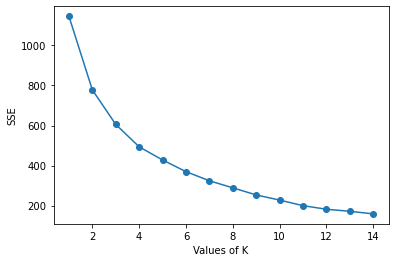

In [6]:
Ks = range(1, 15)

results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_scaled)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [7]:
def visualizing_results(pca_result, label, centroids_pca):
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=1, s=200) 
    plt.title('K-means clustering')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()


Visualizing the data


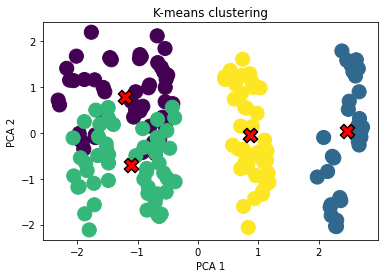

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

print("Visualizing the data")
visualizing_results(pca_2_result, kmeans.labels_, centroids_pca)


Visualizing the data


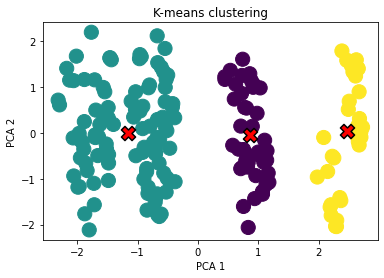

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

print("Visualizing the data")
visualizing_results(pca_2_result, kmeans.labels_, centroids_pca)

In [10]:
X=df_scaled.iloc[:,:].values

In [11]:
X

array([[-1.7001312 ,  1.10495712, -0.58083457,  0.36599421, -0.347584  ,
        -0.49016297],
       [-1.68256425,  1.10495712, -1.29152901, -1.47360827,  0.60082377,
        -0.49016297],
       [-1.6649973 , -0.9050125 , -1.36259845,  1.28579545, -1.29599176,
        -0.49016297],
       ...,
       [ 1.76055783,  1.10495712, -0.50976512,  1.28579545, -1.29599176,
        -0.49016297],
       [ 1.77812478,  1.10495712, -0.50976512,  1.28579545, -1.29599176,
        -0.49016297],
       [ 1.79569173,  1.10495712, -0.65190401,  1.28579545, -1.29599176,
        -0.49016297]])

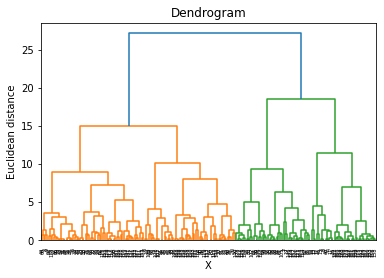

In [12]:
import scipy.cluster.hierarchy as sch
dendrogrm=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel('Euclidean distance')
plt.show()